<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-excercises?scriptVersionId=107329239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bears-fastai-2021/bears/grizzly/00000030.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000042.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000080.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000027.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000095.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000087.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000089.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000048.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000033.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000016.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000088.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000059.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000094.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000028.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000022.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000054.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000050.j

***My computer vision exercises. I begin study this theme***

2022-10-06 09:22:15.029031: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


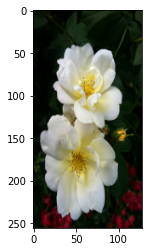

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

def read_and_decode (filename, reshape_dims):
    # read the file
    img = tf.io.read_file (filename = '../input/flowers-recognition/flowers/rose/10090824183_d02c613f10_m.jpg')
    # convert the compressed string to a 3D unit8 tensor
    img = tf.image.decode_jpeg (img, channels = 3)
    # convert 3D unit8 to floats in the [0,1] range
    img = tf.image.convert_image_dtype (img, tf.float32)
    # resize the image to the desired size
    return tf.image.resize (img, reshape_dims)

# visualize image data
IMG_HEIGHT = 256
IMG_WIDTH = 128
def show_image (filename):
    img = read_and_decode (filename, [IMG_HEIGHT, IMG_WIDTH])
    plt.imshow (img.numpy ())
    
show_image ('../input/flowers-recognition/flowers/rose/10090824183_d02c613f10_m.jpg')

***Accessing and manipulating pixels***

In [3]:
import numpy as np
import cv2

# read the rose image and load it into a variable rose_image
rose_image = cv2.imread ('../input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg')

# access a specific pixel using the coordinate based access from the matrix
pixel = rose_image [150, 170]

# see what color space that pixel represents
print (pixel)

# lets change the pixel color value to blue
rose_image [150, 170] = (255, 0, 0)

# lets change the pixel color value to blue in a region range as against
rose_image [120:150, 150:170] = (0, 255, 0)

cv2.line (rose_image, (25, 21), (100, 100), (255, 0, 0), 5)

cv2.rectangle (rose_image, (25, 51), (100, 100), (0, 255, 0), 2)
cv2.circle (rose_image, (50, 50), 50, (0, 0, 255), -1)

[ 26 142 237]


array([[[ 42,  49,  34],
        [ 39,  49,  33],
        [ 39,  51,  33],
        ...,
        [ 13,  42,  16],
        [ 12,  41,  15],
        [ 12,  41,  15]],

       [[ 40,  48,  31],
        [ 37,  47,  30],
        [ 37,  49,  31],
        ...,
        [ 17,  43,  25],
        [ 16,  42,  24],
        [ 15,  41,  23]],

       [[ 38,  46,  29],
        [ 35,  45,  28],
        [ 36,  48,  28],
        ...,
        [ 19,  48,  25],
        [ 18,  48,  23],
        [ 17,  47,  22]],

       ...,

       [[ 31, 140,  91],
        [ 91, 142,  98],
        [ 82, 123,  95],
        ...,
        [ 49,  96,  47],
        [ 48,  95,  46],
        [ 48,  94,  47]],

       [[ 19, 141,  87],
        [ 52, 141,  98],
        [ 80, 123,  90],
        ...,
        [ 48,  97,  43],
        [ 50,  96,  44],
        [ 49,  92,  49]],

       [[ 19, 141,  87],
        [ 56, 145, 102],
        [ 90, 133, 100],
        ...,
        [ 48,  96,  44],
        [ 50,  94,  47],
        [ 47,  91,  50]]

**Compute convolutions - 1 dimensional**

In [4]:
import numpy as np
def conv1d (x, w, p = 0, s = 1):
    w_rot = np.array (w[:: -1])
    x_padded = np.array (x)
    if p > 0:
        zero_pad = np.zeros (shape = p)
        x_padded = np.concatenate ([zero_pad, x_padded, zero_pad])
    res = []
    for i in range (0, int (len (x)/s), s):
        res.append (np.sum (x_padded [i:i + w_rot.shape [0]] * w_rot))
    return np.array (res)

# run the test
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print ('Conv1d Implementation:', conv1d (x, w, p = 2, s = 1))

print ('Numpy Results:', np.convolve (x, w, mode = 'same'))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


**Compute convultions - 2 dimensional**

In [5]:
import scipy.signal

def conv2d (X, W, p = (0, 0), s = (1, 1)):
    W_rot = np.array (W) [::-1, ::-1]
    X_orig = np.array (X)
    n1 = X_orig.shape [0] + 2*p [0]
    n2 = X_orig.shape [1] + 2*p [1]
    X_padded = np.zeros (shape = (n1, n2))
    X_padded [p[0]:p[0] + X_orig.shape [0], p[1]:p[1] + X_orig.shape [1]] = X_orig
    res = []
    for i in range (0, int ((X_padded.shape [0] - W_rot.shape [0])/s[0]) +1, s [0]):
        res.append ([])
        for j in range (0, int ((X_padded.shape [1] - W_rot.shape [1]) /s[1]) +1, s[1]):
            X_sub = X_padded [i:i+W_rot.shape [0],j:j + W_rot.shape [1]]
            res [-1].append (np.sum (X_sub * W_rot))
    return (np.array (res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print ('Conv2d Implementation:\n', conv2d (X, W, p = (1, 1), s = (1, 1)))

print ('Scipy ResultsL \n', scipy.signal.convolve2d (X, W, mode = 'same'))

Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
Scipy ResultsL 
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


**Deep learning with fastai**

In [6]:
from fastai.vision.all import *

results = ('../input/bears-fastai-2021/bears')
len (results)

32

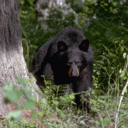

In [7]:
dest = ('../input/bears-fastai-2021/bears/black/00000000.jpg')
im = Image.open (dest)
im.to_thumb (128, 128)

In [8]:
bear_types = 'black', 'grizzly', 'teddy'
path = Path ('../input/bears-fastai-2021/bears')
if not path.exists ():
    path.mkdir ()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir (exist_ok = True)
        results = ('../input/bears-fastai-2021/bears')

In [9]:
fns = get_image_files (path)
fns

(#288) [Path('../input/bears-fastai-2021/bears/grizzly/00000030.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000042.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000080.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000027.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000095.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000087.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000089.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000048.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000033.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000016.jpg')...]

In [10]:
class DataLoaders (GetAttr):
    def __init__ (self, *loaders): self.loaders = loaders
    def __getitem__ (self, i): return self.loaders [i]
    train, valid = add_props (lambda i, self: self [i])

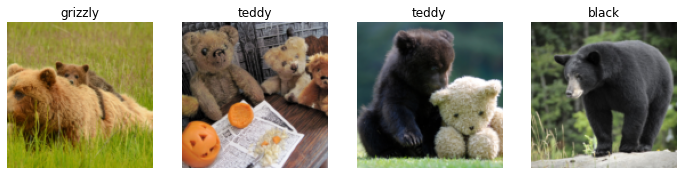

In [11]:
bears = DataBlock (blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter (valid_pct = 0.2, seed = 42),
                  get_y = parent_label, item_tfms = Resize (128))
dls = bears.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

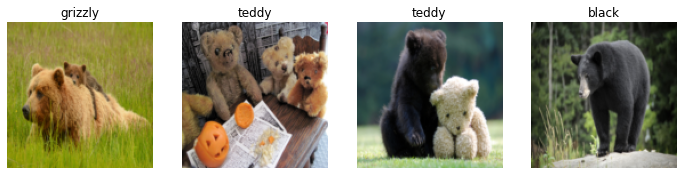

In [12]:
bears = bears.new (item_tfms = Resize (128, ResizeMethod.Squish))
dls = bears.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

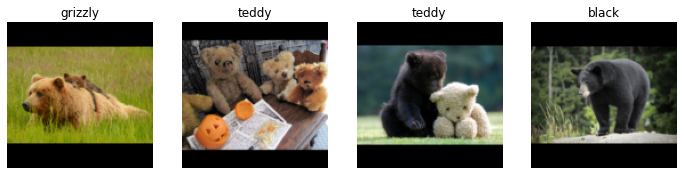

In [13]:
bears = bears.new (item_tfms = Resize (128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = bears.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

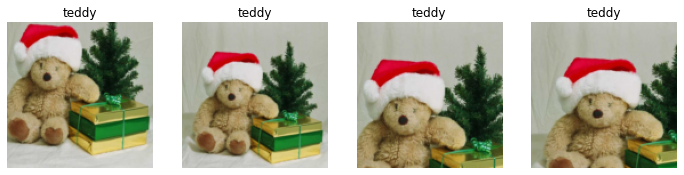

In [14]:
bears = bears.new (item_tfms = RandomResizedCrop (128, min_scale = 0.3))
dls = bears.dataloaders (path)
dls.train.show_batch (max_n = 4, nrows = 1, unique = True)

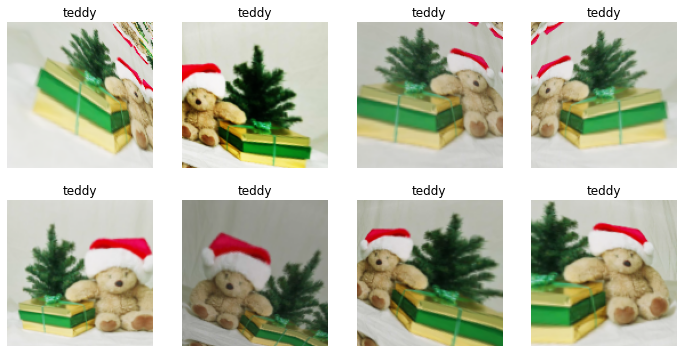

In [15]:
bears = bears.new (item_tfms = Resize (128), batch_tfms = aug_transforms (mult = 2))
dls = bears.dataloaders (path)
dls.train.show_batch (max_n = 8, nrows = 2, unique = True)

In [16]:
bears = bears.new (item_tfms = RandomResizedCrop (224, min_scale = 0.5),
                  batch_tfms = aug_transforms ())
dls = bears.dataloaders (path)
learn = vision_learner (dls, resnet18, metrics = error_rate)
learn.fine_tune (4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.784419,0.507261,0.210526,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.262929,0.125266,0.035088,00:46
1,0.197561,0.034382,0.017544,00:50
2,0.163857,0.013581,0.000000,00:49
3,0.135224,0.012999,0.000000,00:47


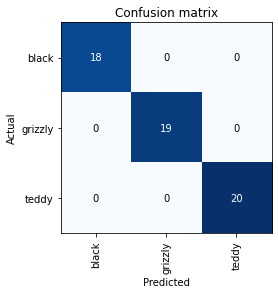

In [17]:
interp = ClassificationInterpretation.from_learner (learn)
interp.plot_confusion_matrix ()

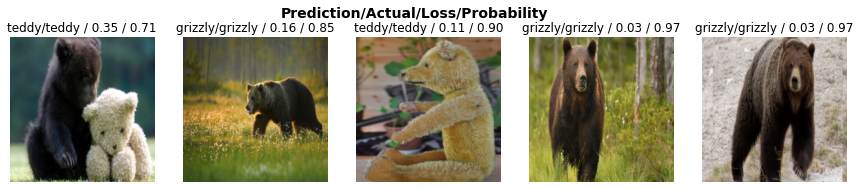

In [18]:
interp.plot_top_losses (5, nrows = 1)

In [19]:
learn.export ()
path = Path ()
path.ls (file_exts ='.pkl')
learn_inf = load_learner (path/'export.pkl')
learn_inf.predict ('../input/bears-fastai-2021/bears/grizzly/00000004.jpg')

('grizzly', TensorBase(1), TensorBase([1.2515e-03, 9.9873e-01, 2.2156e-05]))

In [20]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [21]:
from fastai.vision.all import *

# download a sample of MNIST that contains images digits
path = untar_data (URLs.MNIST_SAMPLE)
path.ls ()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [22]:
# print the items in directory 'train'
(path/'train').ls ()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [23]:
# look on folders '3' and '7' (this is targets)
threes = (path/'train'/'3').ls ().sorted ()
sevens = (path/'train'/'7').ls ().sorted ()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [24]:
# print the image hand-written number from MNIST dataset 
im3_path = threes [1]
im3 = Image.open (im3_path)
im3

In [25]:
# convert image in a NumPy array
array (im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [26]:
# convert a image in a PyTorch tensor
tensor (im3) [4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [27]:
# using a gradient to show how image is created
im3_t = tensor (im3)
df = pd.DataFrame (im3_t [4:15, 4:22])
df.style.set_properties (**{'font_size': '6pt'}).background_gradient ('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [28]:
# check the number of returned items
seven_tensors = [tensor (Image.open (o)) for o in sevens]
three_tensors = [tensor (Image.open (o)) for o in threes]
len (three_tensors), len (seven_tensors)

(6131, 6265)

<AxesSubplot:>

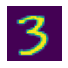

In [29]:
# apply the show_image function
show_image (three_tensors [1])

In [30]:
# images are floats and we divide by 255
stacked_sevens = torch.stack (seven_tensors).float ()/255
stacked_threes = torch.stack (three_tensors).float ()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [31]:
# length tensor is its rank
len (stacked_threes.shape)

3

In [32]:
# tensor rank
stacked_threes.ndim

3

<AxesSubplot:>

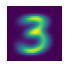

In [33]:
# compute the average of that pixel over all images
mean3 = stacked_threes.mean (0)
show_image (mean3)

<AxesSubplot:>

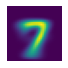

In [34]:
# do the same thing for 7
mean7 = stacked_sevens.mean (0)
show_image (mean7)

<AxesSubplot:>

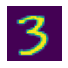

In [35]:
# pick 3 and measure its distance from ideal digit
a_3 = stacked_threes [1]
show_image (a_3)

In [36]:
# measure the distance from 3 with mathematics
dist_3_abs = (a_3 - mean3).abs ().mean ()
dist_3_sqr = ((a_3 - mean3)**2).mean ().sqrt ()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [37]:
# measure the distance from 7 with mathematics
dist_7_abs = (a_3 - mean7).abs ().mean ()
dist_7_sqr = ((a_3 - mean7)**2).mean ().sqrt ()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [38]:
# calculate the mean squared error 
F.l1_loss (a_3.float (), mean7), F.mse_loss (a_3, mean7).sqrt ()

(tensor(0.1586), tensor(0.3021))

In [39]:
# create numpy array
data = [[2,3,4], [5,6,7]]
arr = array (data)
tns = tensor (data)
arr

array([[2, 3, 4],
       [5, 6, 7]])

In [40]:
# create tensor array
tns

tensor([[2, 3, 4],
        [5, 6, 7]])

In [41]:
# select a row (index start with 0)
tns [0]

tensor([2, 3, 4])

In [42]:
# select a column
tns [:, 2]

tensor([4, 7])

In [43]:
# use the maultiplication operation to array
tns * 2

tensor([[ 4,  6,  8],
        [10, 12, 14]])

In [44]:
# tensor type
tns.type ()

'torch.LongTensor'

In [45]:
# change integer to float
tns * 2.7

tensor([[ 5.4000,  8.1000, 10.8000],
        [13.5000, 16.2000, 18.9000]])

In [46]:
# create tensors
valid_3_tens = torch.stack ([tensor (Image.open (o))
                            for o in (path/'valid'/'3').ls ()])
valid_3_tens = valid_3_tens.float ()/255
valid_7_tens = torch.stack ([tensor (Image.open (o))
                            for o in (path/'valid'/'7').ls ()])
valid_7_tens = valid_7_tens.float ()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [47]:
# create a function that calculates the mean absolute error
def mnist_distance (a, b):
    return (a-b).abs ().mean ((-1, -2))
mnist_distance (a_3, mean3)

tensor(0.1114)

In [48]:
# take same distance fucntion for comparing two single images
valid_3_dist = mnist_distance (valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [49]:
# create function for automatically do broadcastinf and be applied elementwise
def is_3 (x):
    return mnist_distance (x, mean3) < mnist_distance (x, mean7)
is_3 (a_3), is_3 (a_3).float ()

(tensor(True), tensor(1.))

In [50]:
# test it on the full validation set of 3s
is_3 (valid_3_tens)

tensor([ True, False, False,  ...,  True,  True, False])

In [51]:
# calculate the accuracy for each of the 3s and 7s
accuracy_3s = is_3 (valid_3_tens).float ().mean ()
accuracy_7s = (1 - is_3 (valid_7_tens).float ()).mean ()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [52]:
# calculate vector argument for our function
xt = tensor ([2., 3., 9.]).requires_grad_ ()
xt

tensor([2., 3., 9.], requires_grad=True)

In [53]:
# add sum to our function and return a scalar
def f (x):
    return (x**2).sum ()

yt = f (xt)
yt

tensor(94., grad_fn=<SumBackward0>)

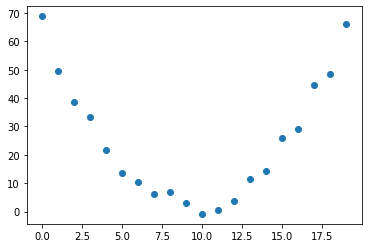

In [54]:
import matplotlib.pyplot as plt

# create a model of how the speed changes over time
time = torch.arange (0, 20).float (); time
speed = torch.randn (20)*3 + 0.75*(time - 9.5)**2 + 1
plt.scatter (time, speed)

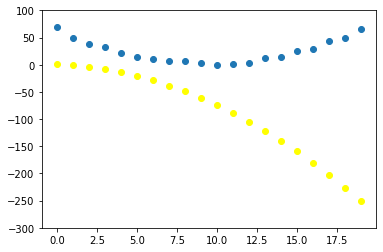

In [55]:
# collect the parameters in one argument of function and separate the input
def f (t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

# use function mean squared error
def mse (preds, targets):
    return ((preds - targets)**2).mean ()

# initialize the parameters
params = torch.randn (3).requires_grad_ ()

# calculate the predictions
preds = f (time, params)

# create a fucntion to show how close our predictions are to our targets
def show_preds (preds, ax = None):
    if ax is None: 
        ax = plt.subplots ()[1]
        ax.scatter (time, speed)
        ax.scatter (time, to_np (preds), color = 'yellow')
        ax.set_ylim (-300, 100)
show_preds (preds)

In [56]:
# calculate the loss
loss = mse (preds, speed)
loss

tensor(20286.4434, grad_fn=<MeanBackward0>)

In [57]:
# calculate the gradients
loss.backward ()
params.grad 

tensor([-47111.2148,  -3035.5593,   -226.7276])

In [58]:
# convert numbers to a more convenient format
params.grad * 1e-5

tensor([-0.4711, -0.0304, -0.0023])

In [59]:
params

tensor([-0.6341, -1.2160,  1.3101], requires_grad=True)

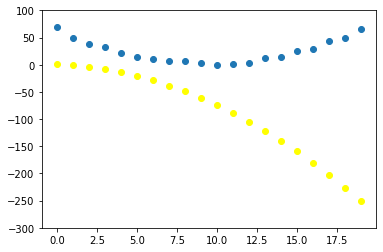

In [60]:
# step the weights
lr = 1e-5

def apply_step (params, prn = True):
    preds = f(time, params)
    loss = mse (preds, speed)
    loss.backward ()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print (loss.item ())
        return preds
show_preds (preds)

In [61]:
for i in range (10):
    apply_step (params)

20286.443359375
896.18505859375
625.9807739257812
574.8455810546875
565.1649169921875
563.3287353515625
562.976806640625
562.9059448242188
562.88818359375
562.8804931640625


In [62]:
# MNIST loss function
train_x = torch.cat ([stacked_threes, stacked_sevens]).view (-1, 28*28)
train_y = tensor ([1] * len (threes) + [0] * len (sevens)).unsqueeze (1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [63]:
# apply zip function
dset = list (zip (train_x, train_y))
x, y = dset [0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [64]:
# MNIST loss fucntion with zip
valid_x = torch.cat ([valid_3_tens, valid_7_tens]).view (-1, 28*28)
valid_y = tensor ([1] * len (valid_3_tens) + [0] * len (valid_7_tens)).unsqueeze (1)
valid_dset = list (zip (valid_x, valid_y))

def init_params (size, std = 1.0):
    return (torch.randn (size)* std).requires_grad_ ()
weights = init_params ((28*28, 1))
bias = init_params (1)
(train_x [0]*weights.T).sum () + bias

tensor([-4.3398], grad_fn=<AddBackward0>)

In [65]:
# matrix ,ultiplication
def linear1 (xb):
    return xb@weights + bias
preds = linear1 (train_x)
preds

tensor([[-4.3398],
        [-9.3975],
        [-6.0090],
        ...,
        [ 4.6045],
        [13.5409],
        [ 1.2435]], grad_fn=<AddBackward0>)

In [66]:
# check our accuracy
corrects = (preds>0.0).float () == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [67]:
corrects.float ().mean ().item ()

0.1888512372970581

In [68]:
# create a loss function to measure the distance between predictions and targets
trgts = tensor ([2, 0, 2])
prds = tensor ([0.9, 0.4, 0.2])
def mnist_loss (predictions, targets):
    return torch.where (targets == 1, 1 - predictions, predictions).mean ()
torch.where (trgts == 1, 1 - prds, prds)

tensor([0.9000, 0.4000, 0.2000])

In [69]:
# load DataLoader for training model
coll = range (15)
dl = DataLoader (coll, batch_size = 5, shuffle = True)
list (dl)

[tensor([ 7,  8, 11,  0,  1]),
 tensor([10,  6,  4, 13,  2]),
 tensor([ 5, 12,  9, 14,  3])]

In [70]:
# create a simple dataset
ds = L (enumerate (string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [71]:
dl = DataLoader (ds, batch_size = 6, shuffle = True)
list (dl)

[(tensor([ 1, 20, 17,  9,  4,  2]), ('b', 'u', 'r', 'j', 'e', 'c')),
 (tensor([ 0, 24,  6, 22, 13, 14]), ('a', 'y', 'g', 'w', 'n', 'o')),
 (tensor([25,  8, 19,  7, 21, 23]), ('z', 'i', 't', 'h', 'v', 'x')),
 (tensor([ 3, 12,  5, 18, 11, 16]), ('d', 'm', 'f', 's', 'l', 'q')),
 (tensor([10, 15]), ('k', 'p'))]